In [2]:
!pip install pandas numpy matplotlib seaborn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 5.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 5.7 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 5.3 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 5.6 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 5.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 5.6 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 5.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --- ---

In [3]:
# 📦 STEP 1: Install libraries (optional if already installed)
# !pip install pandas numpy matplotlib seaborn

# 🔍 STEP 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 📂 STEP 3: Load the Dataset
# Upload the file in Colab using the upload button, or use your local path
from google.colab import files
uploaded = files.upload()

# Replace 'uber.csv' with your actual filename
df = pd.read_csv('uber.csv')

# Clean column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df.head()


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'google'

In [ ]:
# Shape and structure
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Check nulls
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Descriptive statistics
df.describe()


In [ ]:
# Mean, median, mode, std
print("Mean Fare:", df['fare_amount'].mean())
print("Median Fare:", df['fare_amount'].median())
print("Mode Fare:", df['fare_amount'].mode()[0])
print("Std Dev Fare:", df['fare_amount'].std())

# Quartiles & IQR
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Range
print("Fare Range:", df['fare_amount'].min(), "to", df['fare_amount'].max())


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.show()


In [ ]:
# If trip_distance column exists:
if 'trip_distance' in df.columns:
    sns.scatterplot(data=df, x='trip_distance', y='fare_amount')
    plt.title('Fare Amount vs. Distance')
    plt.show()

# Convert pickup_datetime if available
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

    # Fare vs. time of day
    df['hour'] = df['pickup_datetime'].dt.hour
    sns.lineplot(data=df, x='hour', y='fare_amount')
    plt.title("Fare vs Hour of Day")
    plt.show()


In [ ]:
# Date parts
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Peak time (7–9 AM, 5–7 PM)
def peak_hour(hour):
    return 'Peak' if hour in [7, 8, 17, 18] else 'Off-Peak'

df['peak_time'] = df['hour'].apply(peak_hour)

# Categorical encoding
df['weekday'] = df['weekday'].astype('category')
df['peak_time'] = df['peak_time'].astype('category')

df[['pickup_datetime', 'hour', 'weekday', 'peak_time']].head()


In [ ]:
# Plot pickup locations
if 'pickup_longitude' in df.columns and 'pickup_latitude' in df.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df.sample(1000), alpha=0.5)
    plt.title("Pickup Locations (Sample)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


In [6]:
# ✅ STEP 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ STEP 2: Load CSV from same folder
df = pd.read_csv("uber.csv")  # Make sure uber.csv is in the same directory

# ✅ STEP 3: Clean column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# ✅ STEP 4: Show the first few rows
df.head()


,unnamed:_0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.50,2015-05-07 19:52:06 UTC,-74.00,40.74,-74.00,40.72,1
1,27835199,2009-07-17 20:04:56.0000002,7.70,2009-07-17 20:04:56 UTC,-73.99,40.73,-73.99,40.75,1
2,44984355,2009-08-24 21:45:00.00000061,12.90,2009-08-24 21:45:00 UTC,-74.01,40.74,-73.96,40.77,1
3,25894730,2009-06-26 08:22:21.0000001,5.30,2009-06-26 08:22:21 UTC,-73.98,40.79,-73.97,40.80,3
4,17610152,2014-08-28 17:47:00.000000188,16.00,2014-08-28 17:47:00 UTC,-73.93,40.74,-73.97,40.76,5


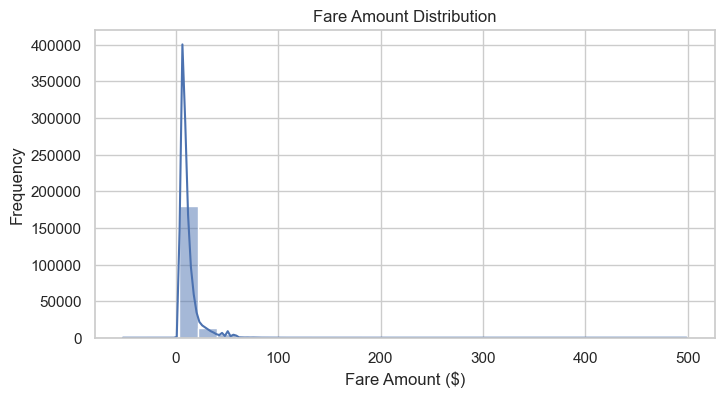

In [7]:
# ✅ Histogram of Fare Amount
plt.figure(figsize=(8, 4))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()


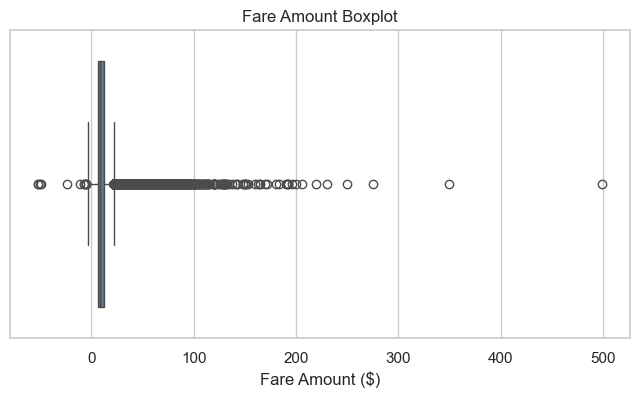

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.xlabel("Fare Amount ($)")
plt.show()


In [10]:
df.columns


Index(['unnamed:_0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Radius of Earth in kilometers
    R = 6371.0

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Apply to DataFrame
df['trip_distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

# View new column
df[['fare_amount', 'trip_distance_km']].head()


,fare_amount,trip_distance_km
0,7.50,1.68
1,7.70,2.46
2,12.90,5.04
3,5.30,1.66
4,16.00,4.48


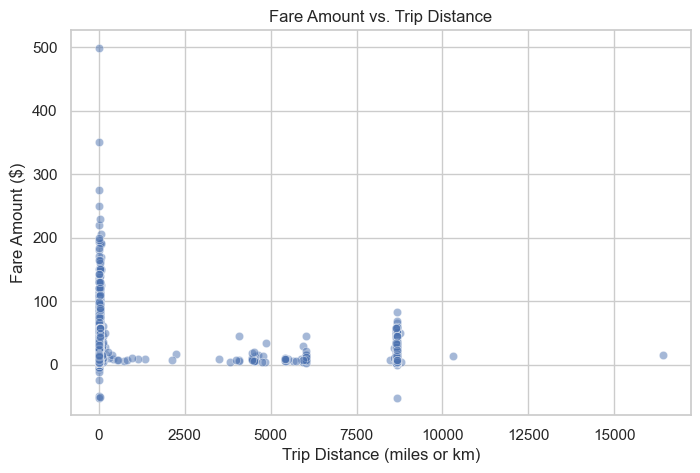

In [12]:
# Ensure required libraries are already imported:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_distance_km', y='fare_amount', alpha=0.5)
plt.title("Fare Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles or km)")
plt.ylabel("Fare Amount ($)")
plt.show()


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [14]:
df = pd.read_csv("uber.csv")
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


In [15]:
# Convert datetime column
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Create new time features
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.day_name()


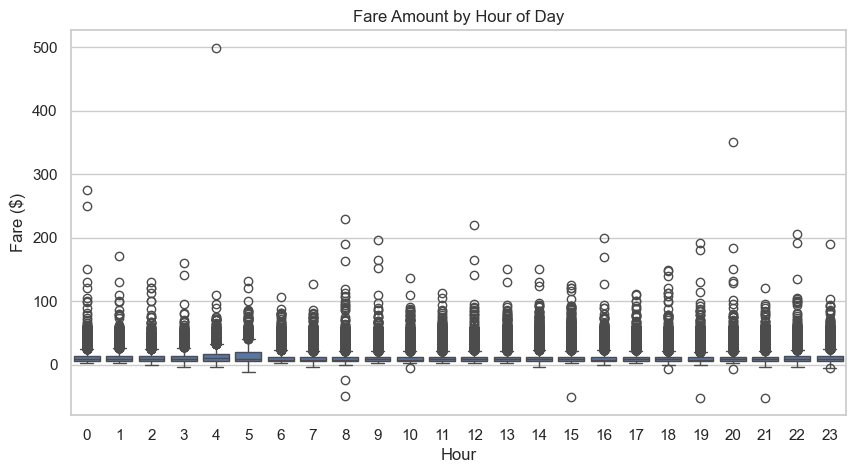

In [16]:
sns.boxplot(data=df, x='hour', y='fare_amount')
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fare ($)")
plt.show()


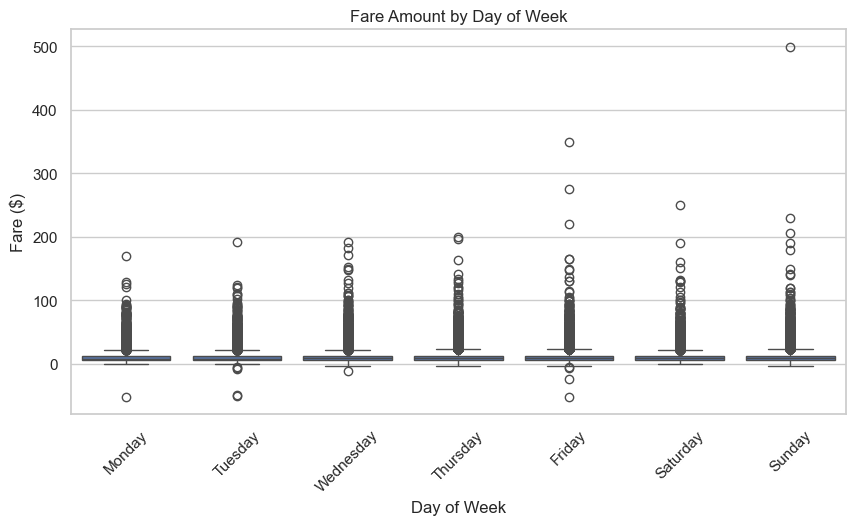

In [17]:
# Ensure weekday is ordered
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = CategoricalDtype(categories=weekday_order, ordered=True)
df['weekday'] = df['weekday'].astype(cat_dtype)

sns.boxplot(data=df, x='weekday', y='fare_amount')
plt.title("Fare Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Fare ($)")
plt.xticks(rotation=45)
plt.show()


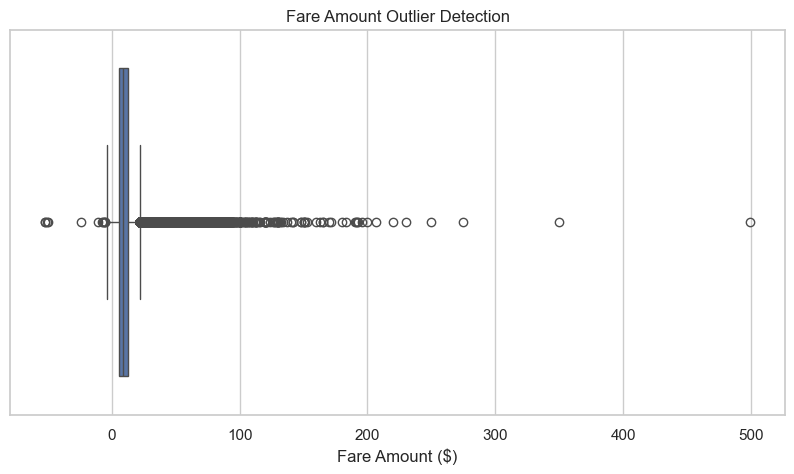

In [18]:
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Outlier Detection")
plt.xlabel("Fare Amount ($)")
plt.show()


In [19]:
# 📊 Total number of rides
total_rides = len(df)

# 👥 Total passengers (sum of passenger_count)
total_passengers = df['passenger_count'].sum()

# 🧮 Average number of passengers per ride
avg_passengers_per_ride = df['passenger_count'].mean()

# 💵 Average fare amount
avg_fare = df['fare_amount'].mean()

# 💵 Total revenue (sum of fares)
total_revenue = df['fare_amount'].sum()

# 📆 Date range (earliest and latest)
min_date = df['pickup_datetime'].min()
max_date = df['pickup_datetime'].max()

# Display summary
print(f"✅ Total rides: {total_rides}")
print(f"👥 Total passengers: {total_passengers}")
print(f"👥 Avg passengers per ride: {avg_passengers_per_ride:.2f}")
print(f"💵 Average fare: ${avg_fare:.2f}")
print(f"💵 Total revenue (sum of fares): ${total_revenue:,.2f}")
print(f"📆 Date range: {min_date} to {max_date}")


✅ Total rides: 200000
👥 Total passengers: 336907
👥 Avg passengers per ride: 1.68
💵 Average fare: $11.36
💵 Total revenue (sum of fares): $2,271,991.05
📆 Date range: 2009-01-01 01:15:22+00:00 to 2015-06-30 23:40:39+00:00


In [20]:
# Optional: Clean up unnecessary columns before export
# df = df.drop(columns=['unnamed:_0', 'key'], errors='ignore')

# Save to CSV file
df.to_csv("uber_cleaned_for_powerbi.csv", index=False)

print("✅ Cleaned dataset saved as 'uber_cleaned_for_powerbi.csv'")


✅ Cleaned dataset saved as 'uber_cleaned_for_powerbi.csv'
